## Steps to run:

1. Use google collab
2. Make sure the data set and data loader are uploaded as files on Collab.


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
np.random.seed(0)

In [0]:
import data_loader

In [0]:
!unzip -uq "/content/facial_expressions.zip"


## Image loading and pre-processing

In [0]:
train_files ,train_labels ,valid_files, valid_labels, test_files ,test_labels, label_dict = \
   data_loader.load_dataset('./project/images', 'project/data/legend.csv', valid_rate=0.1)

In [7]:
label_dict

{'anger': 7,
 'contempt': 4,
 'disgust': 1,
 'fear': 5,
 'happiness': 2,
 'neutral': 6,
 'sadness': 3,
 'surprise': 0}

In [0]:
label_dict_inv = dict(map(reversed, label_dict.items()))

In [18]:
train_img = list()
hppy_val = label_dict['happiness']
for i in np.where(train_labels==hppy_val)[0]:
  train_img.append(train_files[i])
  
print(train_img)

['./project/images/Aparna_Pillai_0001.jpg', './project/images/Emanuel_Ginobili_0005.jpg', './project/images/Kevin_Borseth_0001.jpg', './project/images/Tony_Blair_0121.jpg', './project/images/HrithikRoshan_27.jpg', './project/images/Ms_Dynamite_0001.jpg', './project/images/Takuma_Sato_0001.jpg', './project/images/Alexandra_Stevenson_0003.jpg', './project/images/Monique_Garbrecht-Enfeldt_0003.jpg', './project/images/Hideki_Matsui_0001.jpg', './project/images/Dominique_Perben_0001.jpg', './project/images/Eduardo_Duhalde_0011.jpg', './project/images/Ferenc_Madl_0002.jpg', './project/images/Gianna_Angelopoulos-Daskalaki_0002.jpg', './project/images/Colin_Powell_0163.jpg', './project/images/Hugh_Grant_0005.jpg', './project/images/Jon_Gruden_0006.jpg', './project/images/Kitin_Munoz_0001.jpg', './project/images/Tim_Blake_Nelson_0001.jpg', './project/images/Jayamadhuri_105.jpg', './project/images/Edward_Norton_0002.jpg', './project/images/Hun_Sen_0001.jpg', './project/images/Jennette_Bradley_00

In [0]:
def image_to_feature_vector(image, size=(64, 64)):
	return cv2.resize(image, size)#.flatten()

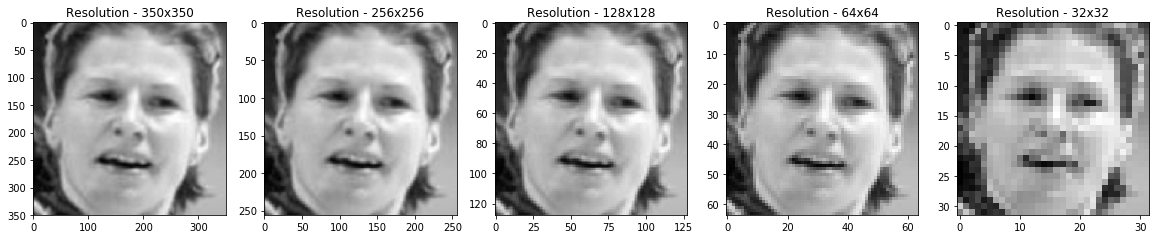

In [27]:
resol = [350, 256, 128, 64, 32]
img = cv2.imread(train_img[8], 0)
fig, ax = plt.subplots(1,5,figsize=(20,20))
for i,x in enumerate(resol):
  i2 = image_to_feature_vector(img, (x,x))
  ax[i].set_title('Resolution - ' + str(x) + 'x' + str(x))
  ax[i].imshow(np.reshape(i2, (x,x)), cmap='gray')

In [19]:
imgs = []

for t,im_path in enumerate(train_img):
  img = cv2.imread(im_path, 0)
  img2 = image_to_feature_vector(img)
  imgs.append(img2)

imgs = np.asarray(imgs)

for x in [10,8]:
  plt.figure()
  plt.title('Label - ' + str(label_dict_inv[hppy_val]))
  plt.imshow(np.reshape(imgs[x], (64,64)), cmap='gray')

AttributeError: ignored

In [0]:
tr_images = []

for t,im_path in enumerate(train_files):
  img = cv2.imread(im_path, 0)
  img2 = image_to_feature_vector(img)
  tr_images.append(img2)

tr_images = np.asarray(tr_images)

In [0]:
ts_images = []

for t,im_path in enumerate(test_files):
  img = cv2.imread(im_path, 0)
  img2 = image_to_feature_vector(img)
  ts_images.append(img2)

ts_images = np.asarray(ts_images)

## k-NN Classification

In [0]:
# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier

In [0]:
neigh = KNeighborsClassifier(n_neighbors=10, weights='distance')
neigh.fit(tr_images, train_labels) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [0]:
ts_images.shape

(1378, 1024)

In [0]:
va_images = []

for t,im_path in enumerate(valid_files):
  img = cv2.imread(im_path, 0)
  img2 = image_to_feature_vector(img)
  va_images.append(img2)

va_images = np.asarray(va_images)

In [0]:
testscore = neigh.score(ts_images, test_labels)
validscore = neigh.score(va_images, valid_labels)
trainscore = neigh.score(tr_images, train_labels)

In [0]:
print("Test:", testscore)
print("Valid:", validscore)
print("Train:", trainscore)
# for ix,x in enumerate(range(5,10)):
#   plt.figure()
#   plt.title(label_dict_inv[preds[ix]])
#   plt.imshow(np.reshape(va_images[x], (64,64)), cmap='gray')

Test: 0.6015965166908563
Valid: 0.6117455138662317
Train: 0.9999097961392748


In [0]:
K = [5, 10, 15, 20, 30, 50, 75, 100, 150]
test_scores_dist = []
valid_scores_dist = []
test_scores_uni = []
valid_scores_uni = []

for k in K:
  print(k)
  neigh = KNeighborsClassifier(n_neighbors=k, weights='distance')
  neigh.fit(tr_images, train_labels) 
  test_scores_dist.append(neigh.score(ts_images, test_labels))
  valid_scores_dist.append(neigh.score(va_images, valid_labels))
  print('-')
  neigh2 = KNeighborsClassifier(n_neighbors=k, weights='uniform')
  neigh2.fit(tr_images, train_labels) 
  test_scores_uni.append(neigh2.score(ts_images, test_labels))
  valid_scores_uni.append(neigh2.score(va_images, valid_labels))

5
-
10
-
15
-
20
-
30
-
50
-
75
-
100
-
150
-


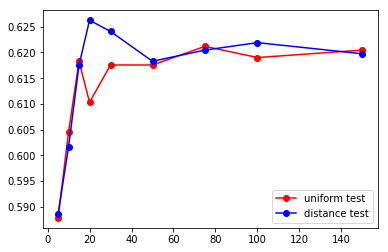

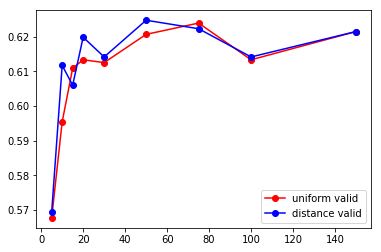

In [0]:
plt.figure()
plt.plot(K, test_scores_uni, 'ro-', label = 'uniform test')
plt.plot(K, test_scores_dist, 'bo-', label = 'distance test')
plt.legend()

plt.figure()
plt.plot(K, valid_scores_uni, 'ro-', label = 'uniform valid')
plt.plot(K, valid_scores_dist, 'bo-', label = 'distance valid')
plt.legend()